In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
#read in data file and skip to data
file=open("/Users/Roslyn/Desktop/run-XXXII", "r")
#print(file.readline()) 

In [3]:
with file as f:
    lines_after_6 = f.readlines()[7:]

#print(lines_after_6[0])

In [4]:
#extract first two coloumns and convert to float
col1=[]
for x in lines_after_6:
    col1.append(float(x.split()[0]))
    
    
col2=[]
for x in lines_after_6:
    col2.append(float(x.split()[1]))

In [5]:
#combine real and imaginary parts to give list of complex data outputs
data=np.vectorize(complex)(col1, col2)
#print(data[0])
#print(len(data))

In [6]:
#split data into batches of 10000 points
batches10000 = [data[x:x+10000] for x in range(0, len(data), 10000)]

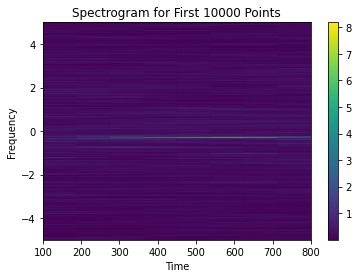

In [7]:
#spectrogram of first set of 10000 points
f, t, Sxx = signal.spectrogram(batches10000[0]-np.mean(batches10000[0]), 10, nperseg=2000, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram for First 10000 Points')
plt.show()

In [8]:
#getting to grips with spectrogram outputs 
#print(f[0])
#print(t[0])
#print(Sxx[0])
print(np.max(Sxx))
#print(np.min(Sxx))
print(Sxx)
#print(len(f))
print(len(t))
#print(len(Sxx))
#print(f)
#print(t)

8.183563381973837
[[0.06718509 0.07229791 0.01516722 0.04970265 0.06202453]
 [0.49601223 0.60106406 0.71191281 0.1691558  0.16803977]
 [0.27622826 0.35796528 0.19548189 0.25176484 0.11355809]
 ...
 [0.70843735 0.10958498 0.5747802  0.10502321 1.49739999]
 [0.90986221 0.88849569 0.95264185 0.03007047 0.73204883]
 [0.54162793 0.07678481 1.22003124 0.318646   1.95919105]]
5


In [9]:
#Dividing each row of spectrogram Sxx by the average for each frequency 
normSxx=[]

for i in range(0,2000):
    normSxx.append(Sxx[i]/np.mean(Sxx[i]))
    

#checking this    
#print(len(normSxx))
#print(normSxx[0])
#print(normSxx[1])
#print(Sxx[0]/np.mean(Sxx[0]))
#print(Sxx[1]/np.mean(Sxx[1]))

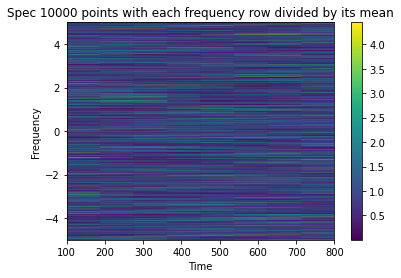

In [10]:
plt.pcolormesh(t, fftshift(f), fftshift(normSxx, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spec 10000 points with each frequency row divided by its mean')
plt.show()

In [11]:
#want to take difference of complex values between time (x axis) and the next time
#product will be spectrogram of values for the time differences 

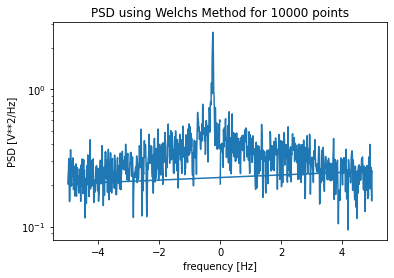

In [12]:
#try calculating PSD using welch's method 
fP, Pxx_den = signal.welch(batches10000[0]-np.mean(batches10000[0]), 10, nperseg=1024, return_onesided=False)
plt.semilogy(fP, Pxx_den)
plt.title('PSD using Welchs Method for 10000 points')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [14]:
print(len(data))

24089000


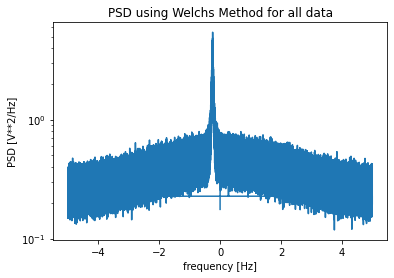

In [20]:
fall, Pxx_all = signal.welch(data-np.mean(data), 10, nperseg=1000000, return_onesided=False)
plt.semilogy(fall, Pxx_all)
plt.title('PSD using Welchs Method for all data')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()